# Previsão de desempenho escolar

#### [Link para a base](https://archive.ics.uci.edu/ml/datasets/student+performance) 
#### [Fonte](http://www3.dsi.uminho.pt/pcortez) Paulo Cortez, University of Minho, Guimarães, Portugal

Os dados da base escolhida abordam o desempenho dos alunos no ensino médio de duas escolas portuguesas. Os atributos de dados incluem notas dos alunos, características demográficas, sociais e relacionadas à escola) e foram coletados por meio de relatórios escolares e questionários. 

São fornecidos dois conjuntos de dados relativos ao desempenho em duas disciplinas distintas: Matemática (mat) e Língua Portuguesa (por). 

#### São encontradas no dataset as seguintes colunas: 
Características demográficas
- `school` - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- `sex` - student's sex (binary: 'F' - female or 'M' - male)
- `age` - student's age (numeric: from 15 to 22)
- `address` - student's home address type (binary: 'U' - urban or 'R' - rural)
- `famsize` - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- `Pstatus` - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- `Medu` - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- `Fedu` - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- `Mjob` - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- `Fjob` - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- `reason` - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- `guardian` - student's guardian (nominal: 'mother', 'father' or 'other')
- `traveltime` - home to school travel time (numeric: 1 - 1 hour)
- `studytime` - weekly study time (numeric: 1 - 10 hours)
- `failures` - number of past class failures (numeric: n if 1<=n<3, else 4)
- `schoolsup` - extra educational support (binary: yes or no)
- `famsup` - family educational support (binary: yes or no)
- `paid` - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- `activities` - extra-curricular activities (binary: yes or no)
- `nursery` - attended nursery school (binary: yes or no)
- `higher` - wants to take higher education (binary: yes or no)
- `internet` - Internet access at home (binary: yes or no)
- `romantic` - with a romantic relationship (binary: yes or no)
- `famrel` - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- `freetime` - free time after school (numeric: from 1 - very low to 5 - very high)
- `goout` - going out with friends (numeric: from 1 - very low to 5 - very high)
- `Dalc` - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- `Walc` - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- `health` - current health status (numeric: from 1 - very bad to 5 - very good)
- `absences` - number of school absences (numeric: from 0 to 93)

Desempenho escolar
- `G1` - first period grade (numeric: from 0 to 20)
- `G2` - second period grade (numeric: from 0 to 20)
- `G3` - final grade (numeric: from 0 to 20, output target)

Segundo _Paulo Cortez_, responsável pelo dataset, o atributo alvo G3 tem forte correlação com os atributos G2 e G1. Isso ocorre porque G3 é a nota do último ano (emitida no 3º período), enquanto G1 e G2 correspondem às notas do 1º e 2º períodos. É mais difícil prever G3 sem G2 e G1, mas essa previsão é muito mais útil.

Neste projeto iremos lidar com uma base pequena, tendo o desafio de conseguir atuar de forma eficiente com _Business Intelligence_ sobre um processo do mundo real com uma amostragem limitada.

### Carregando módulos importantes

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import metrics, svm

### Carregando o dataset

Neste estudo analisaremos o dataset referente às notas na disciplina _Língua Portuguesa_, por possuir mais amostras (649).

In [77]:
# data = pd.read_csv('student-mat.csv')
data = pd.read_csv('student-por.csv')

In [78]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [79]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


###  Análises prévias

[Text(0.5, 0, 'Notas no terceiro período (G3)'),
 Text(0, 0.5, 'Número de alunos')]

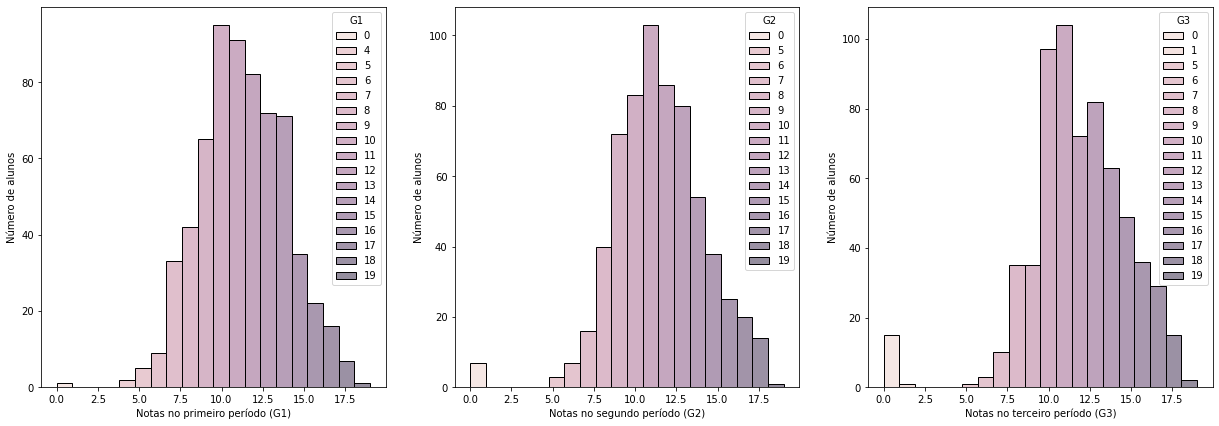

In [80]:
fg, axs = plt.subplots(1,3, figsize=(21,7))
b1 = sns.histplot(data, x="G1", binwidth=0.95, ax=axs[0], hue="G1")
b1.set(xlabel='Notas no primeiro período (G1)', ylabel='Número de alunos')
b2 = sns.histplot(data, x="G2", binwidth=0.95, ax=axs[1], hue="G2")
b2.set(xlabel='Notas no segundo período (G2)', ylabel='Número de alunos')
b3 = sns.histplot(data, x="G3", binwidth=0.95, ax=axs[2], hue="G3")
b3.set(xlabel='Notas no terceiro período (G3)', ylabel='Número de alunos')

[Text(0.5, 0, 'Escolas'), Text(0, 0.5, 'Alunos por escola')]

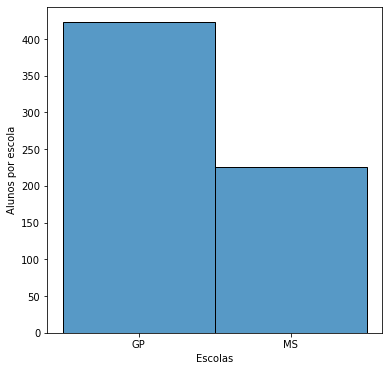

In [81]:
fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(data, x="school", binwidth=1, ax=ax)
ax.set(xlabel='Escolas', ylabel='Alunos por escola')

### Tratando os dados

Para submeter as features a um classificador precisaremos, primeiramente, de colocar todos os dados em forma númerica. Para isso serão usadas funções de substituição.

In [82]:
func_map = {'GP':1, 'MS':2}
data['school'] = data['school'].map(func_map)

In [83]:
func_map =  {'F': 1, 'M': 0}
data['sex'] = data['sex'].map(func_map)

In [84]:
func_map =  {'U': 1, 'R': 0}
data['address'] = data['address'].map(func_map)

In [85]:
func_map =  {'LE3': 1, 'GT3': 0}
data['famsize'] = data['famsize'].map(func_map)

In [86]:
func_map =  {'T': 1, 'A': 0}
data['Pstatus'] = data['Pstatus'].map(func_map)

In [87]:
func_map =  {'teacher': 0, 'health': 1, 'services': 2,'at_home': 3,'other': 4}
data['Mjob'] = data['Mjob'].map(func_map)
data['Fjob'] = data['Fjob'].map(func_map)

In [88]:
func_map =  {'home': 0, 'reputation': 1, 'course': 2,'other': 3}
data['reason'] = data['reason'].map(func_map)

In [89]:
func_map =  {'mother': 0, 'father': 1, 'other': 2}
data['guardian'] = data['guardian'].map(func_map)

In [90]:
func_map =  {'yes': 1, 'no': 0}
data['schoolsup'] = data['schoolsup'].map(func_map)
data['famsup'] = data['famsup'].map(func_map)
data['paid'] = data['paid'].map(func_map)
data['activities'] = data['activities'].map(func_map)
data['nursery'] = data['nursery'].map(func_map)
data['higher'] = data['higher'].map(func_map)
data['internet'] = data['internet'].map(func_map)
data['romantic'] = data['romantic'].map(func_map)

In [91]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,0,0,4,4,3,0,...,4,3,4,1,1,3,4,0,11,11
1,1,1,17,1,0,1,1,1,3,4,...,5,3,3,1,1,3,2,9,11,11
2,1,1,15,1,1,1,1,1,3,4,...,4,3,2,2,3,3,6,12,13,12
3,1,1,15,1,0,1,4,2,1,2,...,3,2,2,1,1,5,0,14,14,14
4,1,1,16,1,0,1,3,3,4,4,...,4,3,2,1,2,5,0,11,13,13


Os campos da base possuem escalas diferentes, portanto devemos efetuar a normalização dos dados. Para isso, utilizaremos um normalizador `MinMaxScaler`, colocando todas as colunas feature dentro do intervalo [0,1]

In [92]:
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

### Verificando correlação entre as colunas do dataset com heatmap

Como agora temos todos os campos em formato numérico, podemos ver a correlação geral dos dados.

Assim como a legenda revela, cores mais claras indicam maior correlação.

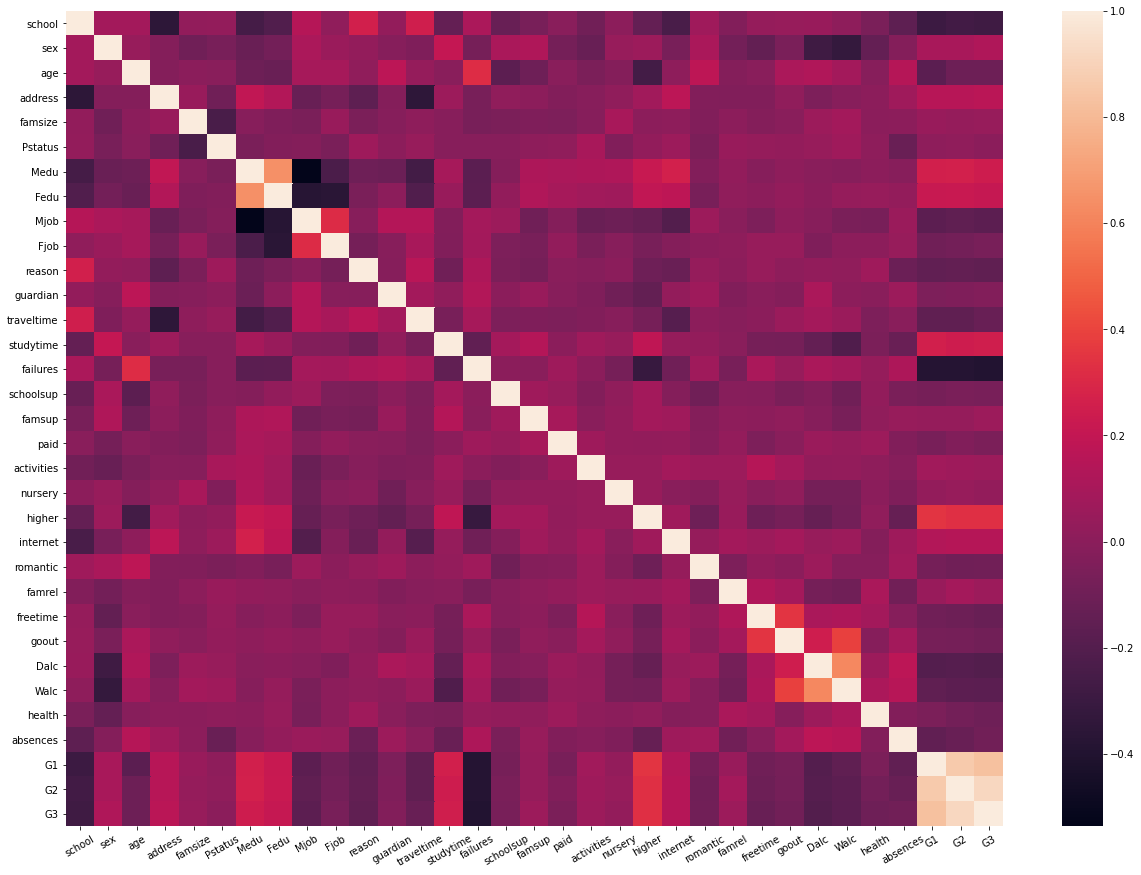

In [93]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(21,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
print()

## Classificação

Utizaremos _Cross Validation 5-fold_, com as partições balanceadas pela aleatoriedade, para validar a qualidade dos modelos na classificação.

In [94]:
k_fold = KFold(n_splits=5, random_state=25, shuffle=True)

Também utilizaremos _GridSearch_ para fazer tuning de parâmetros, visando obter melhor qualidade nos resultados

In [95]:
def cvTunePlot(clf, param_grid, X, y, xticks, xlabel):
    grid = GridSearchCV(clf, param_grid, cv=k_fold, scoring='accuracy', return_train_score=False, n_jobs=-1)
    grid.fit(X, y)

    grid_mean_scores = grid.cv_results_['mean_test_score']
    plt.plot(xticks, grid_mean_scores)
    plt.xlabel(xlabel)
    plt.ylabel('Acurácia 5-fold Cross-Validation')
    plt.show()
    print(grid.best_score_)
    print(grid.best_params_)

### Tentando prever a nota G3 exata, sem levar em conta G1 e G2

Dividimos _features_ e _target_ em treino(80%) e teste(20%), de forma aleatória.

In [96]:
X = data.iloc[:, :30].values
y = data.iloc[:, 32].values

Normalizamos as _features_ 

In [97]:
X = scaler.fit_transform(X)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((519, 30), (130, 30), (519,), (130,))

#### Decision Tree

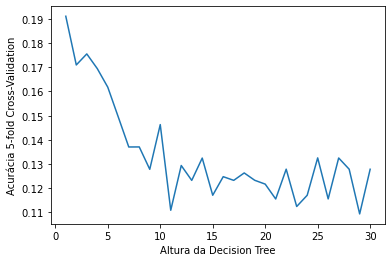

0.19110316040548597
{'max_depth': 1}


In [99]:
k_range = list(range(1, 31))
param_grid = dict(max_depth=k_range)
cvTunePlot(DecisionTreeClassifier(), param_grid, X, y, k_range, "Altura da Decision Tree")

#### KNN

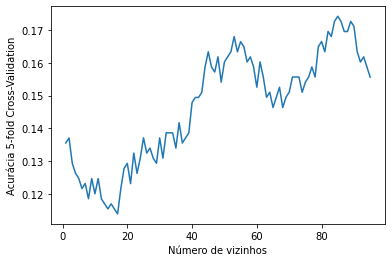

0.17412045319022065
{'n_neighbors': 85}


In [100]:
k_range = list(range(1, 96))
param_grid = dict(n_neighbors=k_range)
cvTunePlot(KNeighborsClassifier(), param_grid, X, y, k_range, "Número de vizinhos")

#### Gradient Tree Boosting

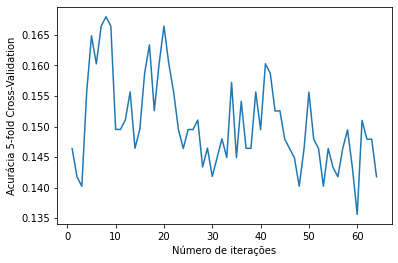

0.16797853309481217
{'n_estimators': 8}


In [101]:
g_range = list(range(1, 65))
param_grid = dict(n_estimators=g_range)
cvTunePlot(GradientBoostingClassifier(learning_rate=0.05), param_grid, X, y, g_range, "Número de iterações")

#### Random Forest

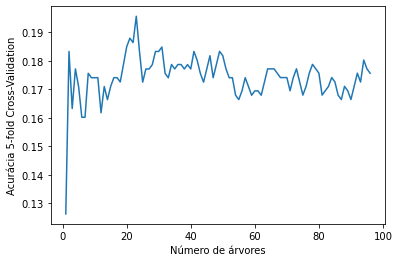

0.19567084078711988
{'n_estimators': 23}


In [102]:
r_range = list(range(1, 97))
param_grid = dict(n_estimators=r_range)
cvTunePlot(RandomForestClassifier(random_state=25, max_depth=4), param_grid, X, y, r_range, "Número de árvores")

#### Observações

Na tentativa de previsão exata da nota G3, os resultados obtidos pra validação foram muito ruins. O melhor resultado para acurácia média em _5-fold cv_  obtido pelo Random Forest, foi de 0.196.

Dentre as justificativas para o resultado observado, podemos considerar o fato de estarmos trabalhando com um dataset pequeno, com o agravante de que estamos tentando calcular com exatidão um campo que assume valores inteiros no intervalo (0,20), podendo portanto assumir 21 valores distintos.

### Pivotando

Considerando os resultados obtidos anteriormente, mudaremos o objetivo da classificação. Ao invés de tentar prever G3 com exatidão, passaremos a tentar prever o desempenho dos alunos por faixas de nota, considerando a média de G1, G2 e G3. Dessa forma teremos uma margem maior de tolerância, fazendo um trade-off entre precisão e acurácia.

O sistema de faixas de nota será baseado no utilizado na UFMG:
- A: >= 90%
- B: >= 80%
- C: >= 70%
- D  >= 60%
- E: >= 40%
- F:  < 40%


In [103]:
data['GAvg'] = (data['G1'] + data['G2'] + data['G3'])/ 3

In [104]:
def define_grade(df):
    grades = []
    for row in df['GAvg']:
        if row >= 18:
            grades.append('A')
        elif row >= 16:
            grades.append('B')
        elif row >= 14:
            grades.append('C')
        elif row >= 12:
            grades.append('D')
        elif row >= 8:
            grades.append('E')
        else:
            grades.append('F')
    df['grades'] = grades
    return df

In [105]:
data = define_grade(data)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,GAvg,grades
0,1,1,18,1,0,0,4,4,3,0,...,4,1,1,3,4,0,11,11,7.333333,F
1,1,1,17,1,0,1,1,1,3,4,...,3,1,1,3,2,9,11,11,10.333333,E
2,1,1,15,1,1,1,1,1,3,4,...,2,2,3,3,6,12,13,12,12.333333,D
3,1,1,15,1,0,1,4,2,1,2,...,2,1,1,5,0,14,14,14,14.000000,C
4,1,1,16,1,0,1,3,3,4,4,...,2,1,2,5,0,11,13,13,12.333333,D


Para a conversão em numéricos, usaremos para cada faixa os valores do Rendimento Semestral Global (RSG) da UFMG.

In [106]:
d = {'F': 0, 'E': 0, 'D': 1, 'C': 3, 'B': 4, 'A': 5}
data['grades'] = data['grades'].map(d)

### Tentando prever o _RSG_ (faixa de desempenho), sem usar valores G1, G2 e G3

Podemos ver que a acurácia em validação foi menor que na fase de teste. Pode ser um indício revelador de underfitting, o que é condizente com a situação, tendo em vista a quantidade de dados que o modelo recebeu em treino.

In [107]:
X = data.iloc[:, :30].values
y = data.iloc[:, 34].values

X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

#### Decision Tree

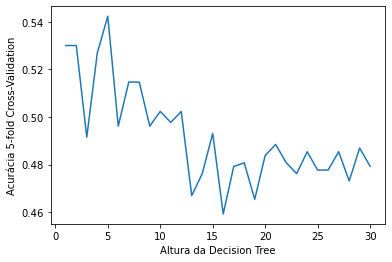

0.5423852116875373
{'max_depth': 5}


In [108]:
k_range = list(range(1, 31))
param_grid = dict(max_depth=k_range)
cvTunePlot(DecisionTreeClassifier(), param_grid, X, y, k_range, "Altura da Decision Tree")

#### KNN

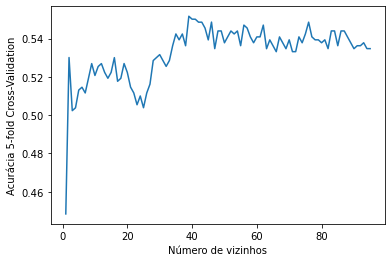

0.5516517590936196
{'n_neighbors': 39}


In [109]:
k_range = list(range(1, 96))
param_grid = dict(n_neighbors=k_range)
cvTunePlot(KNeighborsClassifier(), param_grid, X, y, k_range, "Número de vizinhos")

#### Gradient Tree Boosting

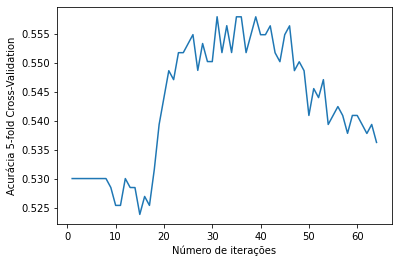

0.5578890876565294
{'n_estimators': 31}


In [110]:
g_range = list(range(1, 65))
param_grid = dict(n_estimators=g_range)
cvTunePlot(GradientBoostingClassifier(learning_rate=0.1, max_depth=2), param_grid, X, y, g_range, "Número de iterações")

#### Random Forest

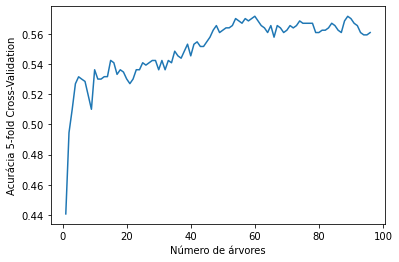

0.5717829457364341
{'n_estimators': 60}


In [111]:
r_range = list(range(1, 97))
param_grid = dict(n_estimators=r_range)
cvTunePlot(RandomForestClassifier(random_state=1245, max_depth=8), param_grid, X, y, r_range, "Número de árvores")

#### Observações sobre a validação

Na tentativa de previsão do desempenho por faixas, os resultados obtidos pra validação muito melhores que na tentativa de predição exata. O melhor resultado para acurácia média em _5-fold cv_, obtido pelo Random Forest, foi de 0.572.

Podemos fazer algumas observações interessantes a partir dos gráficos obtidos. O Decision Tree e o Gradient Tree Boosting aparentemente caíram em overfitting a com o crescimento dos parâmetros variado pois, assim como podemos ver  nos gráficos, houveram quedas expressivas para os valores obtidos na validação cruzada. Em contraste, o KNN e o Random Forest aparentaram atingir um platô, mantendo uma certa estabilidade após um certo valor para os parâmetros variados.


#### Acurácia da previsão em teste

In [112]:
clf = RandomForestClassifier(random_state=1245, max_depth=8, n_estimators=60)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5153846153846153


### Outra alternativa

Como alternativa final para as predições, utilizaremos uma nova abordagem. Pendendo mais para o lado da acurácia no trade-off entre precisão e acurácia, tomaremos como objetivo a classificação binária do desempenho dos alunos, separando aprovados e reprovados.

In [113]:
def define_approval(df):
    approved = []
    for row in df['GAvg']:
        if row >= 12:
            approved.append(1)
        else:
            approved.append(0)
    # Create a column from the list
    df['approved'] = approved
    return df

In [114]:
data = define_approval(data)

In [115]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,GAvg,grades,approved
0,1,1,18,1,0,0,4,4,3,0,...,1,1,3,4,0,11,11,7.333333,0,0
1,1,1,17,1,0,1,1,1,3,4,...,1,1,3,2,9,11,11,10.333333,0,0
2,1,1,15,1,1,1,1,1,3,4,...,2,3,3,6,12,13,12,12.333333,1,1
3,1,1,15,1,0,1,4,2,1,2,...,1,1,5,0,14,14,14,14.000000,3,1
4,1,1,16,1,0,1,3,3,4,4,...,1,2,5,0,11,13,13,12.333333,1,1


In [116]:
X = data.iloc[:, :30].values
y = data.iloc[:, 35].values

X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#### Decision Tree

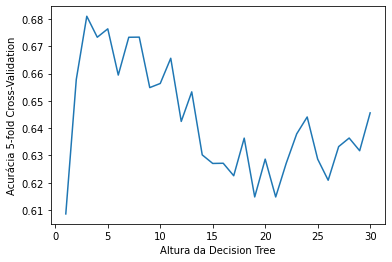

0.6810017889087657
{'max_depth': 3}


In [117]:
k_range = list(range(1, 31))
param_grid = dict(max_depth=k_range)
cvTunePlot(DecisionTreeClassifier(), param_grid, X, y, k_range, "Altura da Decision Tree")

#### KNN

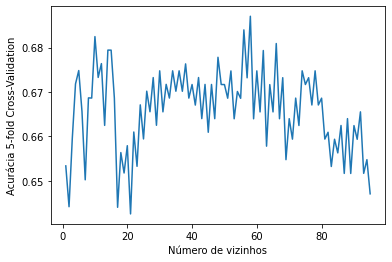

0.6870840787119856
{'n_neighbors': 58}


In [118]:
k_range = list(range(1, 96))
param_grid = dict(n_neighbors=k_range)
cvTunePlot(KNeighborsClassifier(), param_grid, X, y, k_range, "Número de vizinhos")

#### Gradient Tree Boosting

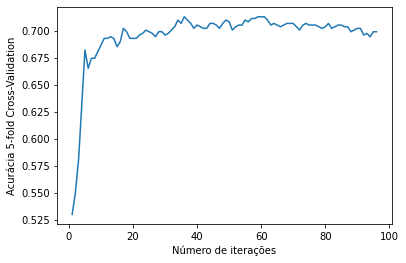

0.7133333333333334
{'n_estimators': 36}


In [119]:
g_range = list(range(1, 97))
param_grid = dict(n_estimators=g_range)
cvTunePlot(GradientBoostingClassifier(learning_rate=0.1, max_depth=2), param_grid, X, y, g_range, "Número de iterações")

#### Random Forest

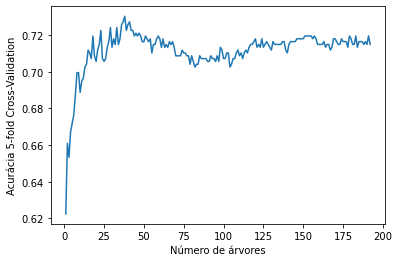

0.7302564102564102
{'n_estimators': 38}


In [120]:
r_range = list(range(1, 193))
param_grid = dict(n_estimators=r_range)
cvTunePlot(RandomForestClassifier(random_state=1245, max_depth=6), param_grid, X, y, r_range, "Número de árvores")

#### Observações sobre a validação

Em comparação com o experimento anterior, do RSG, os resultados foram levemente melhores pra fase de validação. O melhor resultado, 0.73, foi obtido pelo Random forest.

Além disso podemos ver uma mudança expressiva no comportamento do KNN e do GTB. O gráfico KNN apresentou muito menos estabilidade que no experimento anterior, com um aumento inexpressivo no score. Já o GTB mudou de comportamento de uma forma positiva. Aparentemente, na classificação binária, o modelo mostrou-se menos suscetível à overfitting.

#### Acurácia da previsão em teste

In [121]:
clf = RandomForestClassifier(random_state=1245, max_depth=7, n_estimators=47)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7076923076923077


In [122]:
clf.feature_importances_

array([0.03215474, 0.02686639, 0.04205979, 0.0191477 , 0.00856119,
       0.01245015, 0.06919121, 0.03275761, 0.0337986 , 0.02212882,
       0.0393471 , 0.01530862, 0.02749192, 0.04523394, 0.12838825,
       0.02178488, 0.01474162, 0.00878928, 0.00979345, 0.00907399,
       0.06314202, 0.02046825, 0.01030863, 0.02919886, 0.03546497,
       0.03515181, 0.03689257, 0.05686834, 0.04096288, 0.05247241])

In [123]:
data.columns[:30]

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')

#### Importância das features na classificação

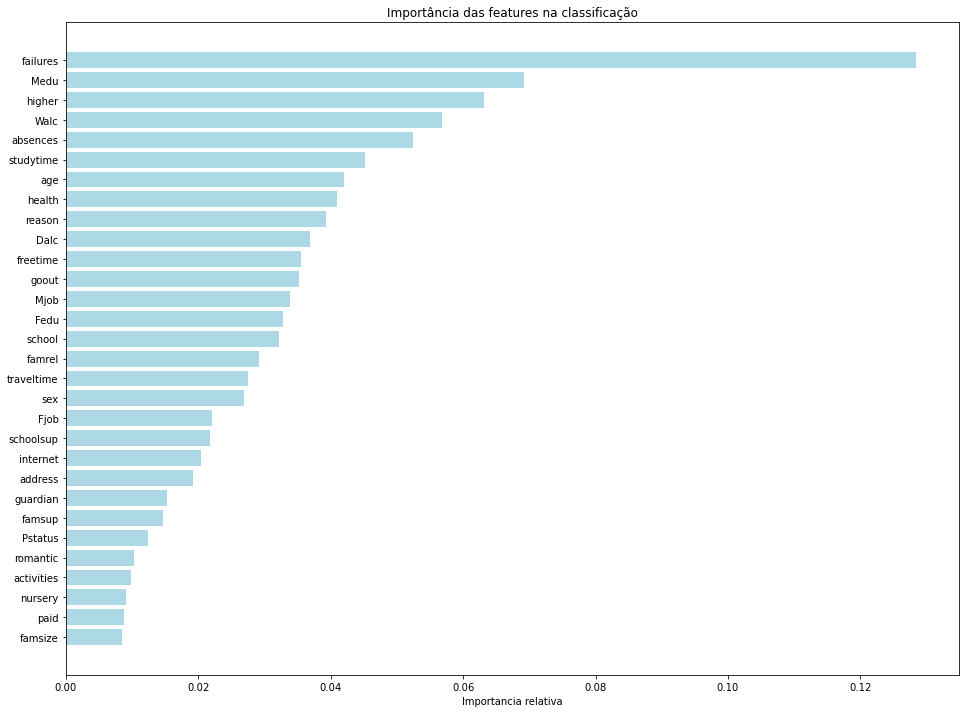

In [124]:
features = data.columns[:30]
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(16,12))
plt.title('Importância das features na classificação')
plt.barh(range(len(indices)), importances[indices], color='lightblue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.show()

Observamos que as 3 features mais relevantes foram:
- Failures: Número de reprovações em seu histórico
- Medu: Nível de ensino da figura materna
- Higher: Deseja ingressar no ensino superior?

Onde _Failures_ dispara em relevância, com quase o dobro de _Medu_.

Enquanto as 3 features menos relevantes foram:
- Famsize: Mais que 3 pessoas na família?
- Nursery: O aluno frequentou o maternal?
- Paid: Frequentou aulas pagas extras?